In [50]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
data_set= pd.read_csv("titanic.csv",encoding="iso=8859-1")
data_set.head()
 

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,family size
0,0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2,Mrs,0
1,1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2,Mrs,0
2,2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2,Mrs,0
3,3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2,Mrs,4
4,4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2,Mrs,1


In [51]:
ds=data_set

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x = ds[['Sex', 'Pclass','Age','family size','Fare']]
y = ds['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

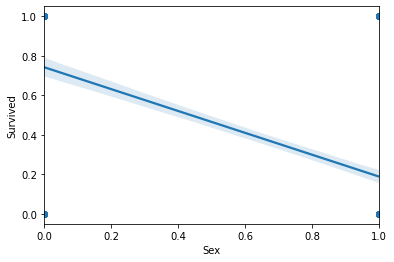

In [52]:
import seaborn as sns
sns.regplot(x='Sex',y='Survived',data=ds)

<AxesSubplot:xlabel='Survived', ylabel='Actual'>

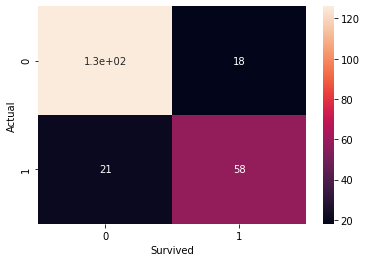

In [53]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Survived'])
sns.heatmap(confusion_matrix, annot=True)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       144
           1       0.76      0.73      0.75        79

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.83      0.82       223



In [55]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend()
    plt.show()

In [56]:
data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
x = ds[['Sex', 'Pclass','Age','family size','Fare']]
y = ds['Survived']
trainX, testX, trainy, testy = train_test_split(x,y, test_size=0.2, random_state=1)
model = RandomForestClassifier()
model.fit(trainX, trainy)

RandomForestClassifier()

In [57]:
probs = model.predict_proba(testX)
probs = probs[:, 1]
auc = roc_auc_score(testy, probs)
print('AUC: %.2f' % auc)

AUC: 0.87


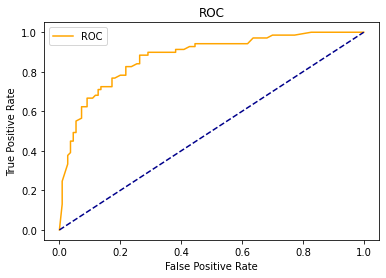

In [58]:
fpr, tpr, thresholds = roc_curve(testy, probs)
plot_roc_curve(fpr, tpr)